In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/train.csv')
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
df.shape

(404290, 6)

In [ ]:
df['is_duplicate'].value_counts()
#Imbalanced dataset is observed here with a difference of 1 lakh

0    255027
1    149263
Name: is_duplicate, dtype: int64

In [ ]:
from sklearn.utils import resample
from numpy.random import seed

seed_value = 35
seed(seed_value)
class_0 = df[df['is_duplicate'] == 0]
class_1 = df[df['is_duplicate'] == 1]
sample_size = 50000
class_0_sampled = resample(class_0, n_samples=sample_size, random_state=seed_value)
class_1_sampled = resample(class_1, n_samples=sample_size, random_state=seed_value)
#Here I have Concatenated the sampled dataframes to create a balanced dataset
balanced_df = pd.concat([class_0_sampled, class_1_sampled])
balanced_df = balanced_df.sample(frac=1, random_state=seed_value).reset_index(drop=True)
#Shuffling

print("Shape of the balanced dataset:", balanced_df.shape)
print("Class distribution in the balanced dataset:")
print(balanced_df['is_duplicate'].value_counts())

Shape of the balanced dataset: (100000, 6)
Class distribution in the balanced dataset:
0    50000
1    50000
Name: is_duplicate, dtype: int64


In [ ]:
balanced_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [ ]:
balanced_df.head(20)

,id,qid1,qid2,question1,question2,is_duplicate
0,52549,73583,93026,"What's the difference between ""Paperback"" and ...",How many chapters in a mass market paperback?,0
1,293258,415002,415003,How can I find suitable projects for gsoc 2017...,How can I find suitable projects for gsoc 2017...,0
2,208189,312113,312114,Which is best time for gym?,What is the best time for gym?,1
3,349231,333095,424110,How do I stop my puppy from biting everything?,How do I stop my Lab puppy from biting?,1
4,398207,99404,531418,Do you think the hype around Pokemon go is ove...,Do you consider Pokemon go an overrated game?,1
5,163988,254931,254932,What are the new amenities in Naya Raipur?,"What are the amenities in Naya, Raipur?",0
6,123201,150278,178399,Will Michelle Obama ever run for the President?,Should Michelle Obama run for president in 2020?,1
7,46967,83921,83922,How do I prepare for Puthat entrance exam?,How should I prepare for Puthat entrance exam?,1
8,168213,8580,80399,How can I make an Opinion Blog on Quora?,How to creat a blog on quora?,1
9,401927,312668,237766,What ever happened to Mad Cow Disease?,What happened to mad cow disease?,1


Preprocessing the Data and creating Heuristic Features

In [ ]:
import re
from bs4 import BeautifulSoup
def preprocess(q):

    q = str(q).lower().strip()
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    #Both good sources
    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    #Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    #Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()


    return q


In [ ]:
balanced_df['question1']=balanced_df['question1'].apply(preprocess)
balanced_df['question2']=balanced_df['question2'].apply(preprocess)

<ipython-input-9-7a002bca3f88>:159: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  q = BeautifulSoup(q)


In [ ]:
balanced_df.head(20)

,id,qid1,qid2,question1,question2,is_duplicate
0,52549,73583,93026,what is the difference between paperback and...,how many chapters in a mass market paperback,0
1,293258,415002,415003,how can i find suitable projects for gsoc 2017...,how can i find suitable projects for gsoc 2017...,0
2,208189,312113,312114,which is best time for gym,what is the best time for gym,1
3,349231,333095,424110,how do i stop my puppy from biting everything,how do i stop my lab puppy from biting,1
4,398207,99404,531418,do you think the hype around pokemon go is ove...,do you consider pokemon go an overrated game,1
5,163988,254931,254932,what are the new amenities in naya raipur,what are the amenities in naya raipur,0
6,123201,150278,178399,will michelle obama ever run for the president,should michelle obama run for president in 2020,1
7,46967,83921,83922,how do i prepare for puthat entrance exam,how should i prepare for puthat entrance exam,1
8,168213,8580,80399,how can i make an opinion blog on quora,how to creat a blog on quora,1
9,401927,312668,237766,what ever happened to mad cow disease,what happened to mad cow disease,1


In [ ]:
balanced_df['q1_len'] = balanced_df['question1'].str.len()
balanced_df['q2_len'] = balanced_df['question2'].str.len()
balanced_df['q1_num_words'] = balanced_df['question1'].apply(lambda row: len(row.split(" ")))
balanced_df['q2_num_words'] = balanced_df['question2'].apply(lambda row: len(row.split(" ")))


In [ ]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)



In [ ]:

balanced_df['word_common'] = balanced_df.apply(common_words, axis=1)

In [ ]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1) + len(w2)


In [ ]:

balanced_df['word_total'] = balanced_df.apply(total_words, axis=1)

balanced_df['word_share'] = round(balanced_df['word_common'] / balanced_df['word_total'], 2)


In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def fetch_token_features(row):
    q1 = row['question1']
    q2 = row['question2']

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0] * 8

    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    common_word_count = len(q1_words.intersection(q2_words))
    common_stop_count = len(q1_stops.intersection(q2_stops))
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))

    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

token_features = balanced_df.apply(fetch_token_features, axis=1)

balanced_df["cwc_min"] = list(map(lambda x: x[0], token_features))
balanced_df["cwc_max"] = list(map(lambda x: x[1], token_features))
balanced_df["csc_min"] = list(map(lambda x: x[2], token_features))
balanced_df["csc_max"] = list(map(lambda x: x[3], token_features))
balanced_df["ctc_min"] = list(map(lambda x: x[4], token_features))
balanced_df["ctc_max"] = list(map(lambda x: x[5], token_features))
balanced_df["last_word_eq"] = list(map(lambda x: x[6], token_features))
balanced_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [ ]:
pip install distance

In [ ]:
import distance

def fetch_length_features(row):

    q1 = row['question1']
    q2 = row['question2']

    length_features = [0.0]*3

    #Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    #Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

    return length_features


In [ ]:
length_features = balanced_df.apply(fetch_length_features, axis=1)
balanced_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
balanced_df['mean_len'] = list(map(lambda x: x[1], length_features))
balanced_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [ ]:
pip install fuzzywuzzy

In [ ]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):

    q1 = row['question1']
    q2 = row['question2']
    fuzzy_features = [0.0]*4
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    #This is  fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    #This is  token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    #This is token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features


In [ ]:

fuzzy_features = balanced_df.apply(fetch_fuzzy_features, axis=1)
balanced_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
balanced_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
balanced_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
balanced_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [ ]:
# import pandas as pd
# balanced_df=pd.read_csv("/content/drive/MyDrive/Balanced_df_question_pair.csv")

In [ ]:
balanced_df.head()

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,0,52549,73583,93026,what is the difference between paperback and...,how many chapters in a mass market paperback,0,69,44,13,...,0.299997,1.0,0.0,2.0,9.0,0.488889,55,69,44,65
1,1,293258,415002,415003,how can i find suitable projects for gsoc 2017...,how can i find suitable projects for gsoc 2017...,0,57,57,12,...,0.999992,1.0,1.0,0.0,12.0,0.982759,100,100,100,100
2,2,208189,312113,312114,which is best time for gym,what is the best time for gym,1,26,29,6,...,0.714276,1.0,0.0,1.0,6.5,0.666667,84,81,84,87
3,3,349231,333095,424110,how do i stop my puppy from biting everything,how do i stop my lab puppy from biting,1,45,38,9,...,0.888879,0.0,1.0,0.0,9.0,0.461538,82,89,82,94
4,4,398207,99404,531418,do you think the hype around pokemon go is ove...,do you consider pokemon go an overrated game,1,52,44,10,...,0.499995,0.0,1.0,2.0,9.0,0.266667,67,70,65,76


In [ ]:
balanced_df.to_csv("Balanced_df_question_pair.csv")

EDA

<Axes: >

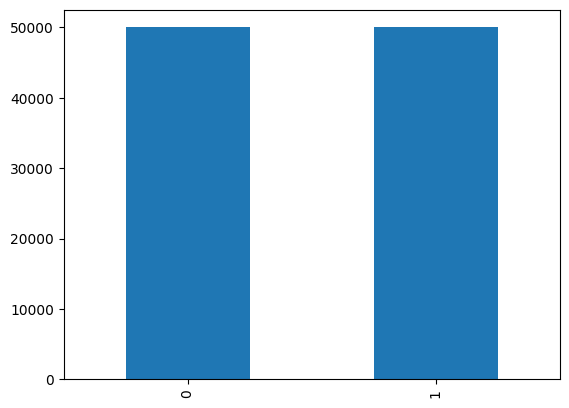

In [ ]:
balanced_df['is_duplicate'].value_counts().plot(kind='bar')

In [ ]:
import numpy as np
qid = pd.Series(balanced_df['qid1'].tolist() + balanced_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 141503
Number of questions getting repeated 32369


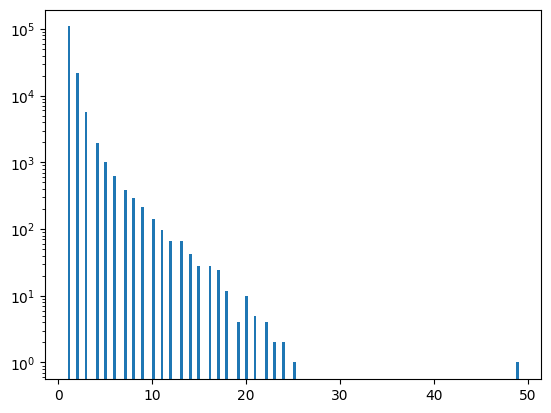

In [ ]:
import matplotlib.pyplot as plt
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

#Seaborn's Pairplot can give us an insight that whether the newly created features are able to differentiate the duplicacy

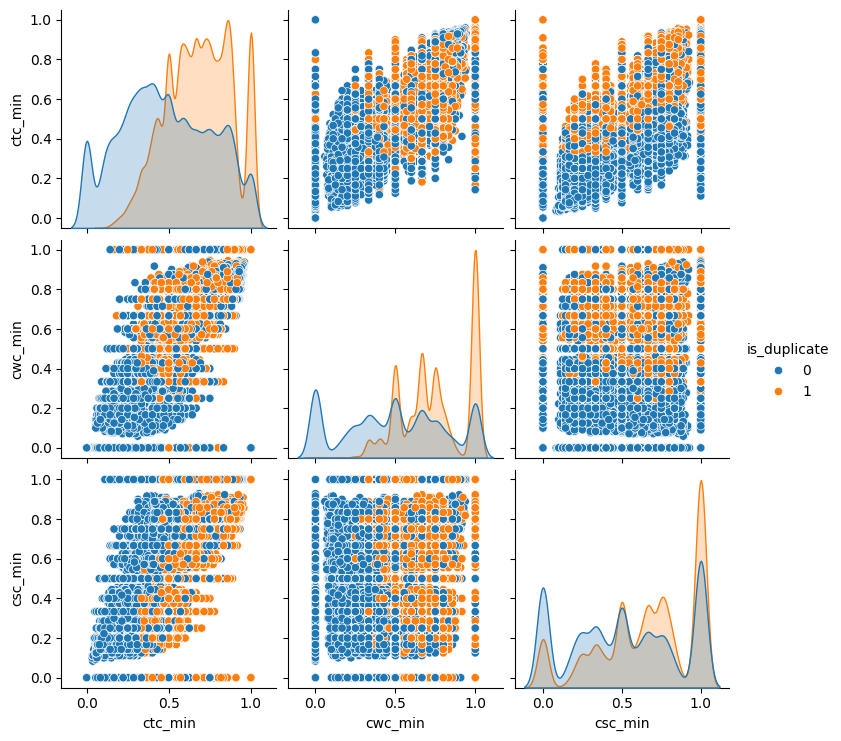

In [ ]:
import seaborn as sns
sns.pairplot(balanced_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

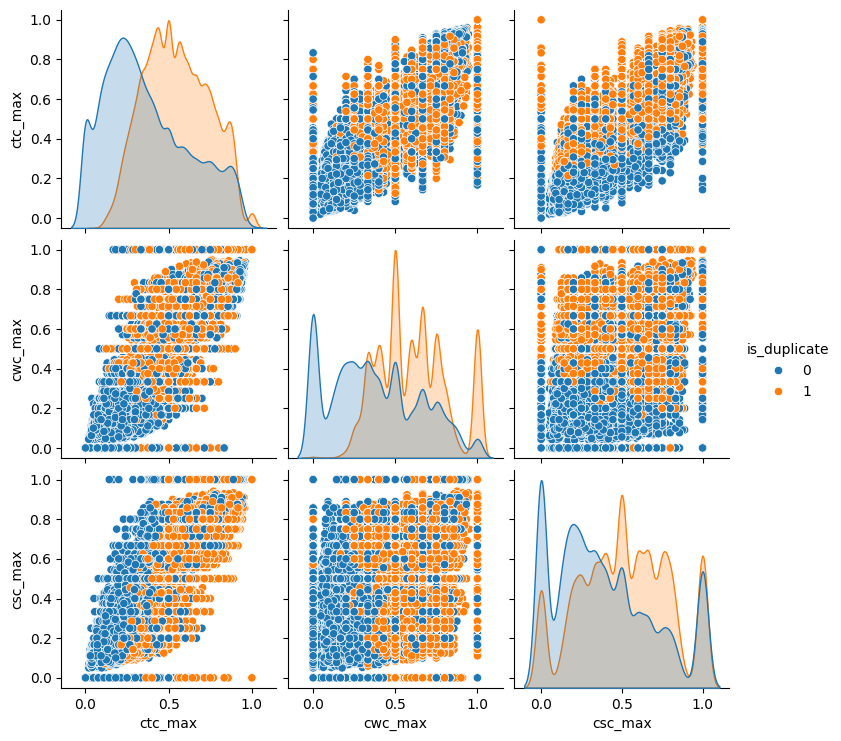

In [ ]:
sns.pairplot(balanced_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

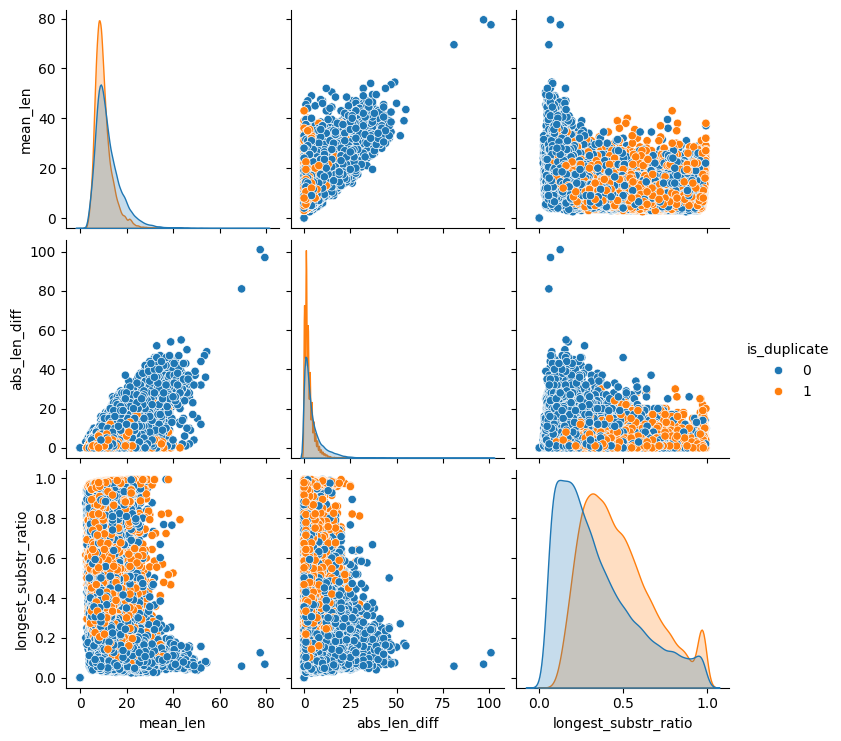

In [ ]:
sns.pairplot(balanced_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

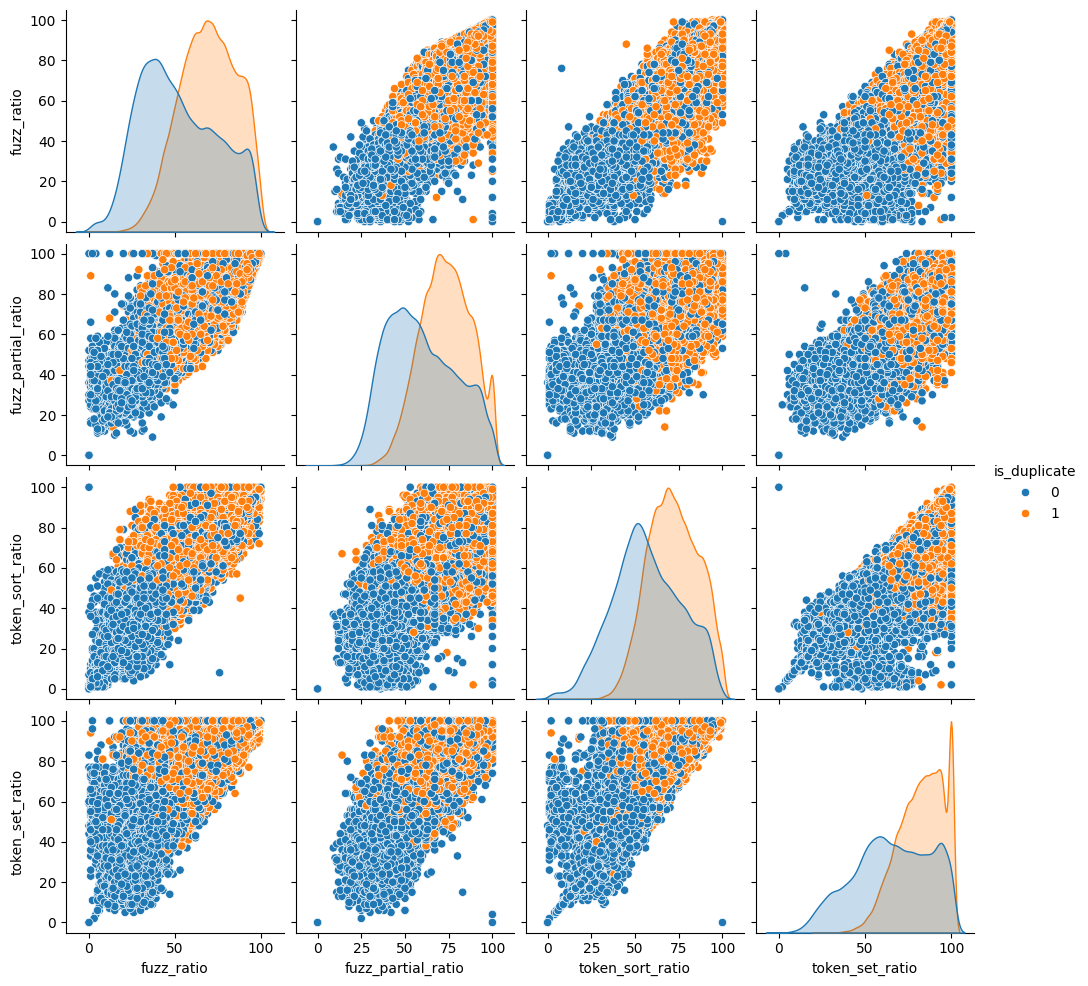

In [ ]:
sns.pairplot(balanced_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

In [ ]:
#Additional analysis can be done using dimensionality reduction techniques

In [ ]:
# # Using UMAP for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

# from sklearn.preprocessing import MinMaxScaler
# X = MinMaxScaler().fit_transform(balanced_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
# y = balanced_df['is_duplicate'].values

In [ ]:
# pip install umap

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3543 sha256=1476b00dad4f9837ca01794e6a33c820d22128c4cbadea54a3d072922f75b130
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap


In [ ]:
# from sklearn.manifold import TSNE

# tsne2d = TSNE(
#     n_components=2,
#     init='pca', # pca
#     random_state=35,
#     method='barnes_hut',
#     n_iter=1000,
#     verbose=2,
#     angle=0.5
# ).fit_transform(X)

In [ ]:
# x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# # draw the plot in appropriate place in the grid
# sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])


In [ ]:
q_df = balanced_df[['question1','question2']]
q_df.head(20)

,question1,question2
0,what is the difference between paperback and...,how many chapters in a mass market paperback
1,how can i find suitable projects for gsoc 2017...,how can i find suitable projects for gsoc 2017...
2,which is best time for gym,what is the best time for gym
3,how do i stop my puppy from biting everything,how do i stop my lab puppy from biting
4,do you think the hype around pokemon go is ove...,do you consider pokemon go an overrated game
5,what are the new amenities in naya raipur,what are the amenities in naya raipur
6,will michelle obama ever run for the president,should michelle obama run for president in 2020
7,how do i prepare for puthat entrance exam,how should i prepare for puthat entrance exam
8,how can i make an opinion blog on quora,how to creat a blog on quora
9,what ever happened to mad cow disease,what happened to mad cow disease


Plain BOW

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# ques=list(q_df['question1'])+list(q_df['question2'])
# cv=CountVectorizer(max_features=1000)
# q1_arr, q2_arr = np.vsplit(cv.fit_transform(ques).toarray(),2)


# Plain Bag Of Words , Gave the accuracy of 79.8 on Random Forest and 73.2 on XGBoost

In [ ]:
# temp_df1 = pd.DataFrame(q1_arr, index= q_df.index)
# temp_df2 = pd.DataFrame(q2_arr, index= q_df.index)
# temp_df = pd.concat([temp_df1, temp_df2], axis=1)
# temp_df.shape

In [ ]:
# temp_df['is_duplicate'] = balanced_df['is_duplicate']

In [ ]:
# temp_df.head()

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=35)

#Using Word2Vec

In [ ]:
final_df = balanced_df.drop(columns=['Unnamed: 0','id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(100000, 23)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,0,69,44,13,8,3,18,0.17,0.749981,0.599988,...,0.299997,1.0,0.0,2.0,9.0,0.488889,55,69,44,65
1,0,57,57,12,12,12,24,0.50,0.999986,0.999986,...,0.999992,1.0,1.0,0.0,12.0,0.982759,100,100,100,100
2,1,26,29,6,7,5,13,0.38,0.999967,0.999967,...,0.714276,1.0,0.0,1.0,6.5,0.666667,84,81,84,87
3,1,45,38,9,9,8,18,0.44,0.749981,0.749981,...,0.888879,0.0,1.0,0.0,9.0,0.461538,82,89,82,94
4,1,52,44,10,8,5,18,0.28,0.599988,0.499992,...,0.499995,0.0,1.0,2.0,9.0,0.266667,67,70,65,76


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from gensim.models import Word2Vec
from sklearn.preprocessing import scale

#We Combine question1 and question2 into a list of sentences
sentences = [str(sentence).split() for sentence in q_df['question1']] + [str(sentence).split() for sentence in q_df['question2']]
model = Word2Vec(sentences, vector_size=500, window=5, min_count=1, workers=4)


In [ ]:
def get_vector(sentence):
    vec_sum = np.zeros(model.vector_size)
    count = 0
    for word in sentence:
        if word in model.wv:
            vec_sum += model.wv[word]
            count += 1
    return vec_sum / count if count != 0 else np.zeros(model.vector_size)

#Now Apply the Word2Vec model to obtain vector representations for each question
q1_arr= q_df['question1'].apply(lambda x: get_vector(str(x).split()))
q2_arr = q_df['question2'].apply(lambda x: get_vector(str(x).split()))


In [ ]:
# import pandas as pd

# # Example data
# array_data = [
#     [0.12972899652086198, 0.0069062098860740665, 0.123456],
#     [0.0839869851867358, 0.08897339917408924, 0.098765],
#     [0.08589571279784043, 0.17170776116351286, 0.13579],
#     [0.07076995509366195, 0.014274644251498912, 0.101112]
# ]
# columns = [f'feature_{i+1}' for i in range(len(array_data[0]))]
# df = pd.DataFrame(array_data, columns=columns)
# print(df)
# type(array_data)

In [ ]:
q1_arr=list(q1_arr)

In [ ]:
columns = [f'feature_{i+1}' for i in range(len(q1_arr[0]))]
temp_df1 = pd.DataFrame(q1_arr, columns=columns)
temp_df1.head()


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_491,feature_492,feature_493,feature_494,feature_495,feature_496,feature_497,feature_498,feature_499,feature_500
0,-0.220189,0.162691,-0.227749,0.166821,-0.170004,-0.214291,-0.010175,-0.116568,-0.214256,0.058504,...,-0.282763,-0.043039,0.372140,0.411226,0.168874,0.009561,-0.264443,0.166166,0.029182,-0.117516
1,-0.276656,-0.088090,-0.309919,0.172090,0.032170,0.141169,-0.201285,-0.107350,0.251725,-0.004854,...,0.327200,-0.242924,0.071150,0.019384,-0.148429,-0.049712,-0.166190,-0.327282,0.121683,-0.256807
2,-0.268730,-0.448761,-0.723286,-0.149647,0.192235,0.514047,0.174015,-0.056497,-0.382818,0.207186,...,0.409530,0.533090,0.435767,0.410516,0.208053,-0.193285,0.074227,-0.328433,0.191995,-0.082132
3,-0.385173,0.212750,0.139122,0.139452,0.523416,-0.055017,-0.318651,-0.211364,0.141559,0.116669,...,-0.097506,-0.470766,-0.526334,0.035053,0.034127,0.174161,-0.632299,0.004210,0.016292,-1.008587
4,-0.149510,-0.063398,-0.176826,-0.020702,0.109800,-0.095576,-0.279164,0.018054,0.078128,-0.099351,...,0.161919,0.029944,-0.138396,0.082501,-0.006892,-0.200174,-0.081324,0.098442,-0.303664,-0.363396


In [ ]:
# temp_df1.to_csv("temp_df1_q_pair.csv")

In [ ]:
q2_arr=list(q2_arr)
columns2 = [f'feature_{i+1}_2' for i in range(len(q2_arr[0]))]
temp_df2 = pd.DataFrame(q2_arr, columns=columns2)
temp_df2.head()

,feature_1_2,feature_2_2,feature_3_2,feature_4_2,feature_5_2,feature_6_2,feature_7_2,feature_8_2,feature_9_2,feature_10_2,...,feature_491_2,feature_492_2,feature_493_2,feature_494_2,feature_495_2,feature_496_2,feature_497_2,feature_498_2,feature_499_2,feature_500_2
0,-0.118769,-0.088189,0.060625,0.333489,0.050029,-0.176720,-0.429596,-0.253274,0.130350,0.072899,...,0.031625,-0.191709,-0.152255,0.045342,-0.215326,0.071834,-0.188519,-0.236015,-0.145894,-0.239491
1,-0.276656,-0.088090,-0.309919,0.172090,0.032170,0.141169,-0.201285,-0.107350,0.251725,-0.004854,...,0.327200,-0.242924,0.071150,0.019384,-0.148429,-0.049712,-0.166190,-0.327282,0.121683,-0.256807
2,-0.283562,-0.368680,-0.545513,-0.088899,0.056552,0.417575,-0.086883,-0.158495,-0.172471,0.246315,...,0.266386,0.422969,0.271921,0.334339,0.199804,-0.145691,0.239483,-0.109418,0.104520,-0.139228
3,-0.364638,0.201782,0.187234,0.153200,0.497389,-0.095207,-0.275390,-0.133209,0.129015,0.106297,...,-0.080632,-0.494342,-0.474076,0.022293,0.015595,0.197967,-0.673488,-0.016743,0.028542,-0.935270
4,-0.353798,-0.053784,-0.471217,0.131994,0.373955,0.203250,-0.171346,-0.248548,0.163431,0.038296,...,-0.088518,0.026178,-0.332760,-0.118952,0.071983,0.138396,-0.282995,0.099972,-0.323184,-0.469625


In [ ]:
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(100000, 1000)

In [ ]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(100000, 1023)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,feature_491_2,feature_492_2,feature_493_2,feature_494_2,feature_495_2,feature_496_2,feature_497_2,feature_498_2,feature_499_2,feature_500_2
0,0,69,44,13,8,3,18,0.17,0.749981,0.599988,...,0.031625,-0.191709,-0.152255,0.045342,-0.215326,0.071834,-0.188519,-0.236015,-0.145894,-0.239491
1,0,57,57,12,12,12,24,0.50,0.999986,0.999986,...,0.327200,-0.242924,0.071150,0.019384,-0.148429,-0.049712,-0.166190,-0.327282,0.121683,-0.256807
2,1,26,29,6,7,5,13,0.38,0.999967,0.999967,...,0.266386,0.422969,0.271921,0.334339,0.199804,-0.145691,0.239483,-0.109418,0.104520,-0.139228
3,1,45,38,9,9,8,18,0.44,0.749981,0.749981,...,-0.080632,-0.494342,-0.474076,0.022293,0.015595,0.197967,-0.673488,-0.016743,0.028542,-0.935270
4,1,52,44,10,8,5,18,0.28,0.599988,0.499992,...,-0.088518,0.026178,-0.332760,-0.118952,0.071983,0.138396,-0.282995,0.099972,-0.323184,-0.469625


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

Neural Net Classifier

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


model = Sequential()
model.add(Dense(800, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.7))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(300, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 800)               818400    
                                                                 
 dropout_6 (Dropout)         (None, 800)               0         
                                                                 
 dense_9 (Dense)             (None, 500)               400500    
                                                                 
 dropout_7 (Dropout)         (None, 500)               0         
                                                                 
 dense_10 (Dense)            (None, 300)               150300    
                                                                 
 dense_11 (Dense)            (None, 1)                 301       
                                                                 
Total params: 1369501 (5.22 MB)
Trainable params: 1369

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/50
1250/1250 [==============================] - 8s 5ms/step - loss: 0.6655 - accuracy: 0.6622 - val_loss: 0.5512 - val_accuracy: 0.7283
Epoch 2/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.5400 - accuracy: 0.7115 - val_loss: 0.5318 - val_accuracy: 0.7391
Epoch 3/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.5231 - accuracy: 0.7208 - val_loss: 0.5375 - val_accuracy: 0.7439
Epoch 4/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.5155 - accuracy: 0.7303 - val_loss: 0.5034 - val_accuracy: 0.7452
Epoch 5/50
1250/1250 [==============================] - 4s 4ms/step - loss: 0.5085 - accuracy: 0.7336 - val_loss: 0.5263 - val_accuracy: 0.7516
Epoch 6/50
1250/1250 [==============================] - 6s 4ms/step - loss: 0.5048 - accuracy: 0.7369 - val_loss: 0.5084 - val_accuracy: 0.7590
Epoch 7/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.4994 - accuracy: 0.7411 - val_loss: 0.5036 - val_accuracy:

In [36]:
y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on neural network: {accuracy * 100:.2f}%')

625/625 [==============================] - 1s 2ms/step
Accuracy on neural network: 78.40%


In [37]:
with open('neural_network_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

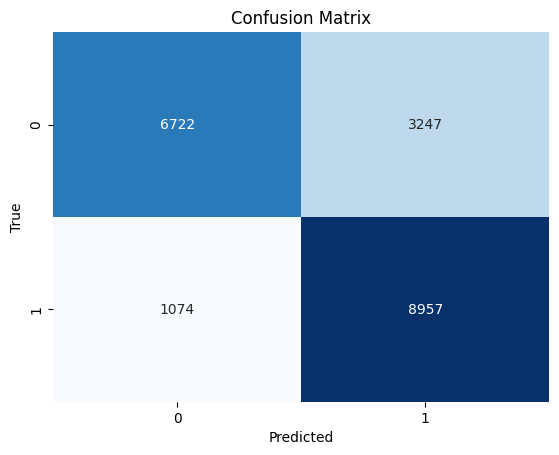

In [38]:

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [39]:
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.67      0.76      9969
           1       0.73      0.89      0.81     10031

    accuracy                           0.78     20000
   macro avg       0.80      0.78      0.78     20000
weighted avg       0.80      0.78      0.78     20000



Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.83545

In [ ]:
print("The final Accuracy Achieved through Random Forest Classifier is:",accuracy_score(y_test,y_pred)*100)

The final Accuracy Achieved through Random Forest Classifier is: 83.545


In [ ]:
import pickle
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(rf, model_file)

with open('word2vec_model.pkl', 'wb') as word2vec_file:
    model.save(word2vec_file)

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.831

In [ ]:
#Accuracy for XGboost is: 83.1%